**Вейвлеты** объединяют в себе два важных свойства подобия и
выраженную локализацию в пространстве и времени.

<!-- Чтобы быть вейвлетами семейство функций должно
удовлетворять следующим требованиям:

**1. Допустимость**

Анализирующий вейвлет $y(t)$, называемый
также материнским вейвлетом, должен иметь нулевое
среднее значение: $\int^{+\infin}_{-\infin}\psi (t) *dt = 0$.

**2. Подобие**

Все функции семейства получаются из анализирующего
вейвлета путем масштабного преобразования и сдвига: $\psi_{a,b}(\frac{t-b}{a})$

Получается двухпараметрическое семейство функций:
параметр $a$ - масштаб (растяжение) функции, параметр $b$ -
положение (сдвиг) функции.

**3. Обратимость**

Существование обратного преобразования,
однозначно восстанавливающее исходную функцию по ее
вейвлет - преобразованию.

**4. Регулярность**

Функция $y(t)$ должна быть хорошо
локализована и в физическом пространстве и в пространстве Фурье.

--- -->

Ключевое отличие предназначения вейвлетов от фильтров — они демонстрируют изменения фукнции во временной области. Это более наглядно заметно на функциях, у которых в этом представлении есть какой-то заметный тренд (например, описывает синусоиду и при этом увеличивается).

In [37]:
import numpy as np
import matplotlib.pyplot as plt

**(1)** Реализовать вейвлет Морле во временном <!-- пространстве: $\large{\psi(t) = e^{-\frac{t^2}{\alpha^2}} * e^{i \omega_0 t}}$ И --> и в частотном пространстве: <!-- $\large{\hat{\psi}(\omega) = \alpha * \sqrt{\pi} * e^{-\alpha^2 * \frac{(\omega - \omega_0)^2}{4}}}$ -->

- `alpha` — ширина гауссиана $\alpha$ (обычно $\alpha^2 = 2 \to \alpha = \sqrt{2}$)
- `k_0` — частота плоской волны $w_0$ (обычно $w_0 = 2$)

In [38]:
def morlet4time(t, alpha, k_0):
    # return np.exp(-t**2 / alpha**2) * ((np.exp(1j * k_0 * t) - np.exp(-k_0**2 * alpha**2) / 4)) # <-- Из лекции
    return np.exp(-(t**2 / alpha**2)) * np.exp(1j * k_0 * t) # <-- Из лабораторной, более частный случай

In [39]:
def morlet4freq(w, alpha, k_0):
    # return alpha * np.sqrt(np.pi) * (np.exp(-alpha**2 * (k_0 - w)**2) / 4 - np.exp(-a**2 * (k_0 + w)**2) / 4) # <-- Из лекции
    return alpha * np.sqrt(np.pi) * np.exp(-(alpha**2 * ((k_0 - w)**2) / 4)) # <-- Из лабораторной, более частный случай

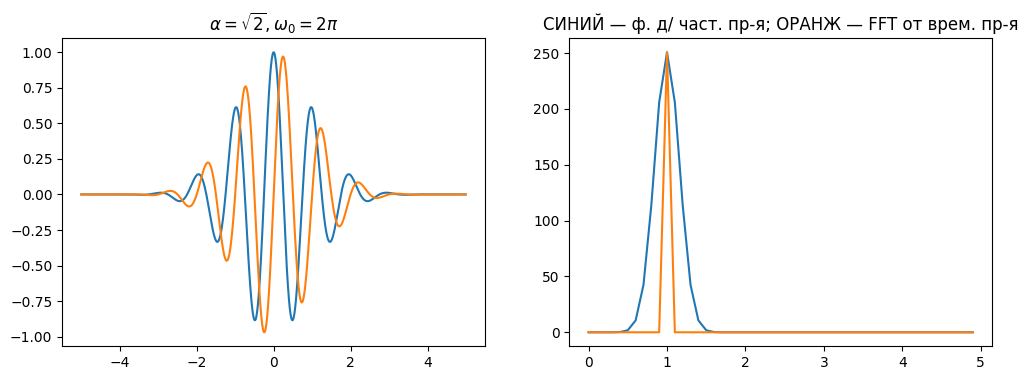

In [40]:
time = np.arange(-5, 5, 0.01)
freq = np.fft.fftfreq(len(time), 0.01)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('$\\alpha = \sqrt{2}, \omega_0 = 2\pi$')
plt.plot(time, np.real([morlet4time(t, np.sqrt(2), 2*np.pi) for t in time]))
plt.plot(time, np.imag([morlet4time(t, np.sqrt(2), 2*np.pi) for t in time]))

plt.subplot(1, 2, 2)
plt.title('СИНИЙ — ф. д/ част. пр-я; ОРАНЖ — FFT от врем. пр-я')
plt.plot(
    freq[0:len(freq)//20],
    np.abs(np.fft.fft([morlet4time(t, np.sqrt(2), 2*np.pi) for t in time]))[0:len(freq)//20]
)
plt.plot(
    freq[0:len(freq)//20],
    [morlet4freq(w, np.sqrt(2) / 0.01, 1) for w in freq][0:len(freq)//20]
)

plt.show()

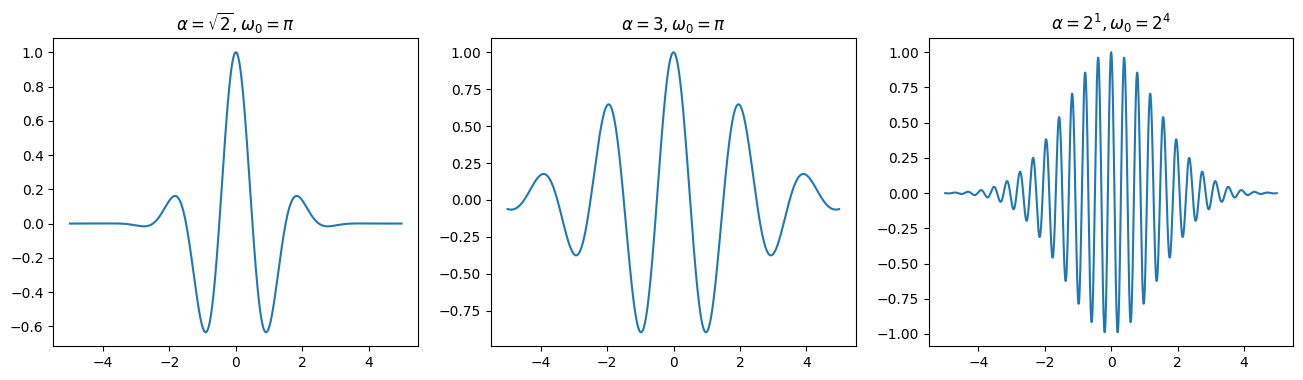

In [41]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$\\alpha = \sqrt{2}, \omega_0 = \pi$')
plt.plot(time, [morlet4time(t, np.sqrt(2), np.pi) for t in time])

plt.subplot(1, 3, 2)
plt.title('$\\alpha = 3, \omega_0 = \pi$')
plt.plot(time, [morlet4time(t, 3, np.pi) for t in time])

plt.subplot(1, 3, 3)
plt.title('$\\alpha = 2^1, \omega_0 = 2^4$')
plt.plot(time, [morlet4time(t, 2**1, 2**4) for t in time])

plt.show()

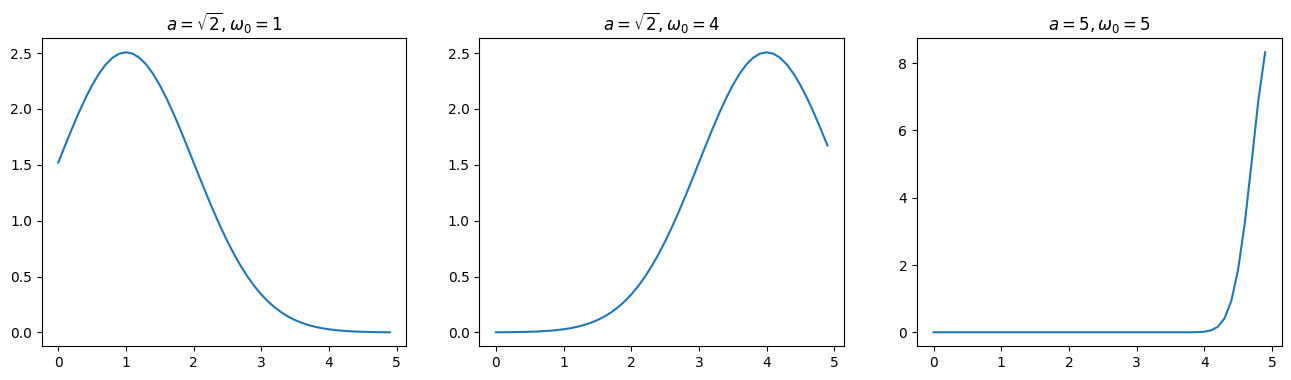

In [42]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$a = \sqrt{2}, \omega_0 = 1$')
plt.plot(freq[0:len(freq)//20], [morlet4freq(w, np.sqrt(2), 1) for w in freq][0:len(freq)//20])

plt.subplot(1, 3, 2)
plt.title('$a = \sqrt{2}, \omega_0 = 4$')
plt.plot(freq[0:len(freq)//20], [morlet4freq(w, np.sqrt(2), 4) for w in freq][0:len(freq)//20])

plt.subplot(1, 3, 3)
plt.title('$a = 5, \omega_0 = 5$')
plt.plot(freq[0:len(freq)//20], [morlet4freq(w, 5, 5) for w in freq][0:len(freq)//20])

plt.show()

**(2)** Реализовать вейвлет [Мексиканская шляпа](https://i.pinimg.com/originals/f6/da/24/f6da24b7ae3ad3f35c7cf090497a6cf3.jpg) во временном <!-- пространстве: $\large{\psi(t) = (1 - \frac{(t - t_0)^2}{\sigma^2}) * e^{- \frac{(t - t_0)^2}{2\sigma^2}} * e^{i\omega_0t}}$ И --> и в частотном пространстве: <!-- $\large{\hat{\psi}(\omega) = (\omega - \omega_0)^2 * e^{-\frac{(\omega - \omega_0)^2*\sigma^2}{2}}}$ -->

- `sigma` — стандартное отклонение $\sigma$ (пер. $2*t$)
- `t_0` — сдвиг по времени $t_0$ (если требуется)
- `w_0` — центральная частота $\omega_0$
- `np.exp(1j * w_0 * t)` — гармоническая осцилляция $e^{i*\omega_0*t}$

In [43]:
def shlyapa4time(t, sigma, t_0, w_0):
    return (1 - ((t - t_0)**2 / sigma**2)) * np.exp(-((t - t_0)**2) / (2 * sigma**2)) * np.exp(1j * w_0 * t)

In [44]:
def shlyapa4freq(w, sigma, w_0):
    return (w - w_0)**2 * np.exp(-((w - w_0)**2 * sigma**2) / 2)

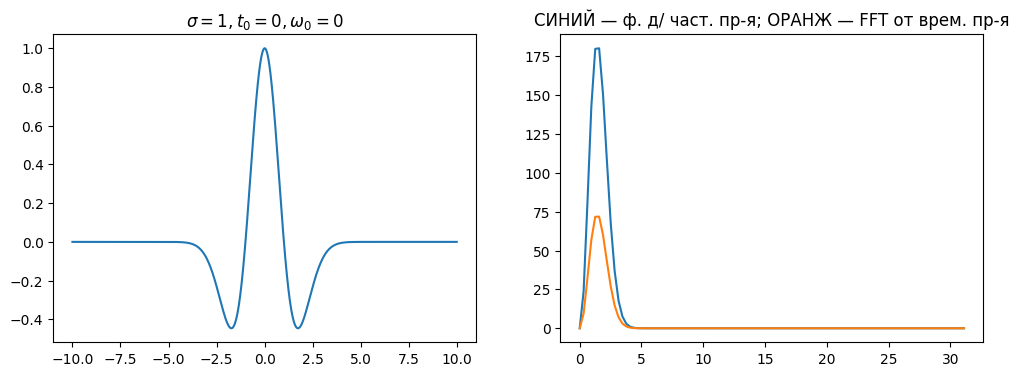

In [45]:
time = np.arange(-10, 10, 0.01)
freq = np.fft.fftfreq(len(time), 0.01) * 2 * np.pi


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('$\sigma = 1, t_0 = 0, \omega_0 = 0$')
plt.plot(time, [shlyapa4time(t, 1, 0, 0) for t in time])

plt.subplot(1, 2, 2)
plt.title('СИНИЙ — ф. д/ част. пр-я; ОРАНЖ — FFT от врем. пр-я')
plt.plot(
    freq[0:len(freq)//20],
    np.abs(np.fft.fft([shlyapa4time(t, 1, 0, 0) for t in time]))[0:len(freq)//20]
)
plt.plot(
    freq[0:len(freq)//20],
    [shlyapa4freq(w, 1, 0) / 0.01 for w in freq][0:len(freq)//20]
)

plt.show()

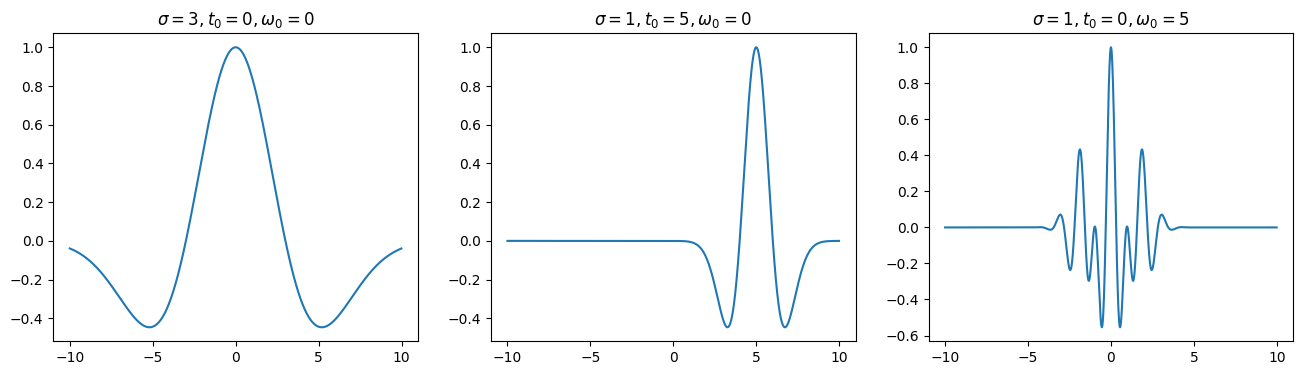

In [46]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$\sigma = 3, t_0 = 0, \omega_0 = 0$')
plt.plot(time, [shlyapa4time(t, 3, 0, 0) for t in time])

plt.subplot(1, 3, 2)
plt.title('$\sigma = 1, t_0 = 5, \omega_0 = 0$')
plt.plot(time, [shlyapa4time(t, 1, 5, 0) for t in time])

plt.subplot(1, 3, 3)
plt.title('$\sigma = 1, t_0 = 0, \omega_0 = 5$')
plt.plot(time, [shlyapa4time(t, 1, 0, 5) for t in time])

plt.show()

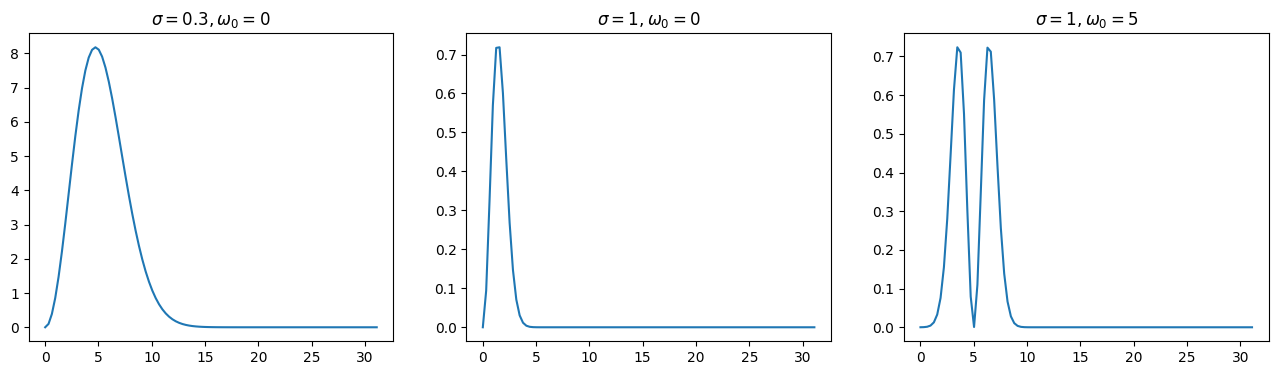

In [47]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$\sigma = 0.3, \omega_0 = 0$')
plt.plot(freq[0:len(freq)//20], [shlyapa4freq(w, 0.3, 0) for w in freq[0:len(freq)//20]])

plt.subplot(1, 3, 2)
plt.title('$\sigma = 1, \omega_0 = 0$')
plt.plot(freq[0:len(freq)//20], [shlyapa4freq(w, 1, 0) for w in freq[0:len(freq)//20]])

plt.subplot(1, 3, 3)
plt.title('$\sigma = 1, \omega_0 = 5$')
plt.plot(freq[0:len(freq)//20], [shlyapa4freq(w, 1, 5) for w in freq[0:len(freq)//20]])

plt.show()

**(3)** Реализовать вейвлет Хаара во временном <!-- тут я наконец подумал, а нафига я переписываю формулы, если они и так даны в лабе/лекции, и решил больше так не делать --> и в частотном пространстве: 

- `nu` — ширина импульса $\nu$

### TODO: Выяснить, почему частотное представление ф-ии через ФНЧ и сама функция для частотного представления не совпадают — проблема явно в самой фукнции, но баг это или фича, непонятно.

In [48]:
def haar4time(t, nu):
    if (0 <= t/nu) and (t/nu < 0.5):
        return 1
    elif (0.5 <= t/nu) and (t/nu < 1):
        return -1
    else:
        return 0

In [49]:
def haar4freq(w, nu):
    return 2j * np.sin(w*nu / (2*2)) * np.exp(-(1j * w*nu) / (2*2))

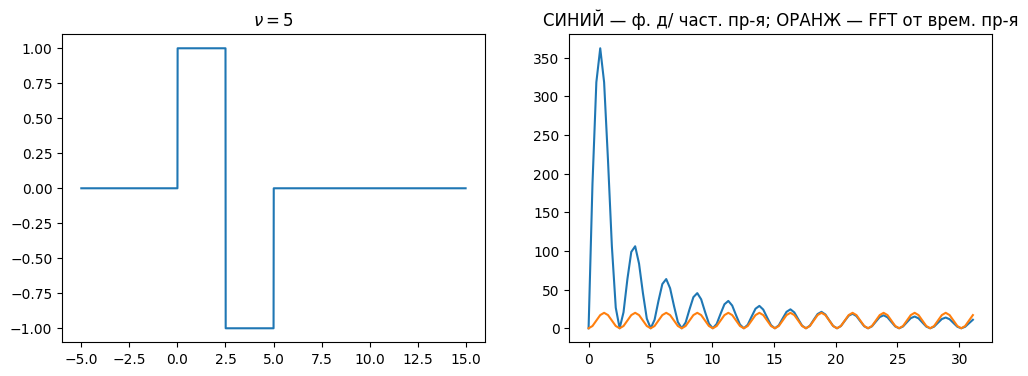

In [50]:
time = np.arange(-5, 15, 0.01)
freq = np.fft.fftfreq(len(time), 0.01) * 2 * np.pi


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('$\\nu = 5$')
plt.plot(time, [haar4time(t, 5) for t in time])

plt.subplot(1, 2, 2)
plt.title('СИНИЙ — ф. д/ част. пр-я; ОРАНЖ — FFT от врем. пр-я')
plt.plot(
    freq[0:len(freq)//20],
    np.abs(np.fft.fft([haar4time(t, 5) for t in time]))[0:len(freq)//20]
)
plt.plot(
    freq[0:len(freq)//20],
    [haar4freq(w, 5) / 0.1 for w in freq][0:len(freq)//20]
)

plt.show()

Для изменения центральной частоты фильтрации можно прим. формулы масштабирования — если мы хотим УВЕЛИЧИТЬ центральную частоту, нужно УМЕНЬШИТЬ временной масштаб, и соответственно наоборот:

- `a` — коэф. масштабирования $a$ ($a < 1$ — вейвлет <!--скукоживается--> сжимается, цетральная частота увел.; $a > 1$ — вейвлет расширяется, ЦЧ уменьш.)

In [51]:
def haar4time_scale(t, nu, a):
    return (1 / np.sqrt(a)) * haar4time(t / a, nu)

In [52]:
def haar4freq_scale(w, nu, a):
    return np.sqrt(a) * haar4freq(a * w, nu)

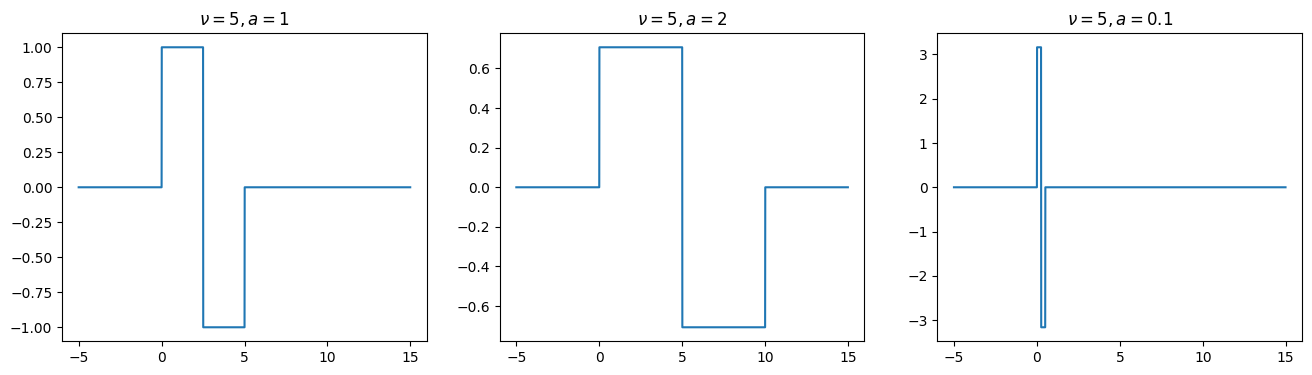

In [53]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$\\nu = 5, a = 1$')
plt.plot(time, [haar4time_scale(t, 5, 1) for t in time])

plt.subplot(1, 3, 2)
plt.title('$\\nu = 5, a = 2$')
plt.plot(time, [haar4time_scale(t, 5, 2) for t in time])

plt.subplot(1, 3, 3)
plt.title('$\\nu = 5, a = 0.1$')
plt.plot(time, [haar4time_scale(t, 5, 0.1) for t in time])

plt.show()

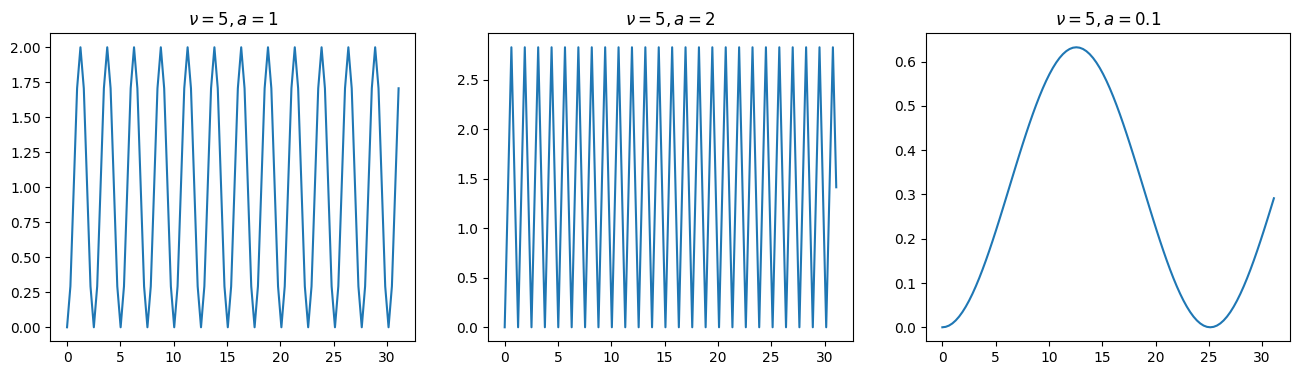

In [54]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title('$\\nu = 5, a = 1$')
plt.plot(freq[0:len(freq)//20], [haar4freq_scale(w, 5, 1) for w in freq[0:len(freq)//20]])

plt.subplot(1, 3, 2)
plt.title('$\\nu = 5, a = 2$')
plt.plot(freq[0:len(freq)//20], [haar4freq_scale(w, 5, 2) for w in freq[0:len(freq)//20]])

plt.subplot(1, 3, 3)
plt.title('$\\nu = 5, a = 0.1$')
plt.plot(freq[0:len(freq)//20], [haar4freq_scale(w, 5, 0.1) for w in freq[0:len(freq)//20]])

plt.show()

**(4)** Берём произвольный сигнал, выполняем свёртку с каждым из вейвлетов, сравниваем результаты

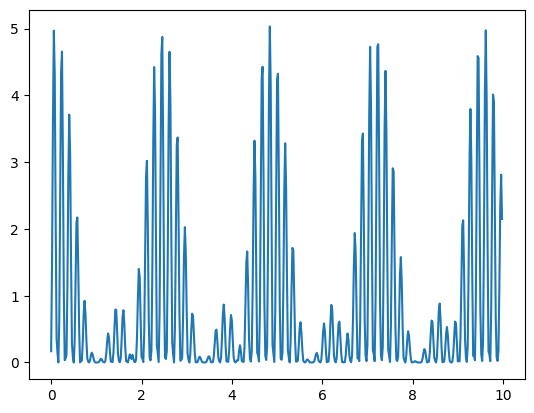

In [55]:
def signal(t):
    return np.abs(
        (
            np.sin(2 * np.pi * t * np.pi) +
            np.cos(2 * np.pi * t * np.e)
        ) * (
            np.sin(2 * np.pi * t * np.pi - np.e) +
            np.sin(2 * np.pi * t * np.e - np.pi)
        )**2
    )

signal_time = np.arange(0, 10, 0.02)
signal_values = [signal(t) for t in signal_time]

plt.plot(signal_time, signal_values)
plt.show()

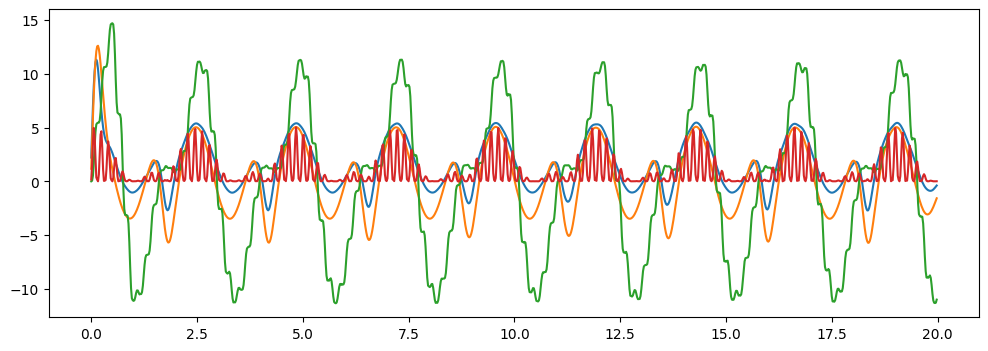

In [56]:
signal_time = np.arange(0, 20, 0.02)
signal_values = [signal(t) for t in signal_time]

morlet_values = [morlet4time(t-(20/2), 0.25, 4*np.pi) for t in signal_time]
signal_morlet_conv = np.convolve(signal_values, morlet_values, mode='same')

shlyapa_values = [shlyapa4time(t, 0.15, (20/2), 0) for t in signal_time]
signal_shlyapa_conv = np.convolve(signal_values, shlyapa_values, mode='same')

haar_values = [haar4time_scale(t-(20/2), 0.10, 10) for t in signal_time]
signal_haar_conv = np.convolve(signal_values, haar_values, mode='same')


plt.figure(figsize=(12, 4))

plt.plot(signal_time, signal_morlet_conv)
plt.plot(signal_time, signal_shlyapa_conv)
plt.plot(signal_time, signal_haar_conv)
plt.plot(signal_time, signal_values)

plt.show()

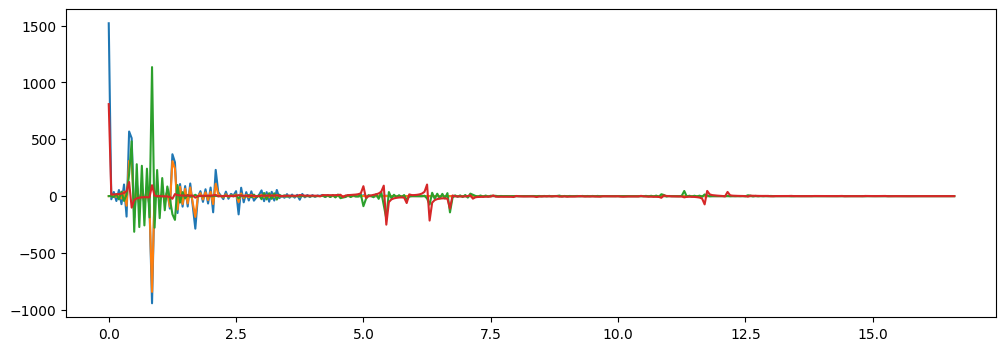

In [57]:
signal_freq = np.fft.fftfreq(len(signal_time), 0.02)
signal_fft = np.fft.fft(signal_values)

morlet_fft = np.fft.fft(morlet_values)
signal_morlet_conv_fft = np.multiply(signal_fft, morlet_fft)

shlyapa_fft = np.fft.fft(shlyapa_values)
signal_shlyapa_conv_fft = np.multiply(signal_fft, shlyapa_fft)

haar_fft = np.fft.fft(haar_values)
signal_haar_conv_fft = np.multiply(signal_fft, haar_fft)


plt.figure(figsize=(12, 4))

plt.plot(signal_freq[0:len(signal_freq)//3], signal_morlet_conv_fft[0:len(signal_freq)//3])
plt.plot(signal_freq[0:len(signal_freq)//3], signal_shlyapa_conv_fft[0:len(signal_freq)//3])
plt.plot(signal_freq[0:len(signal_freq)//3], signal_haar_conv_fft[0:len(signal_freq)//3])
plt.plot(signal_freq[0:len(signal_freq)//3], signal_fft[0:len(signal_freq)//3])

plt.show()

*всёв*

### TODO: 5, 6 (можно нинада :с)